# Libraries

In [27]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from scipy.integrate import odeint
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

# Random data

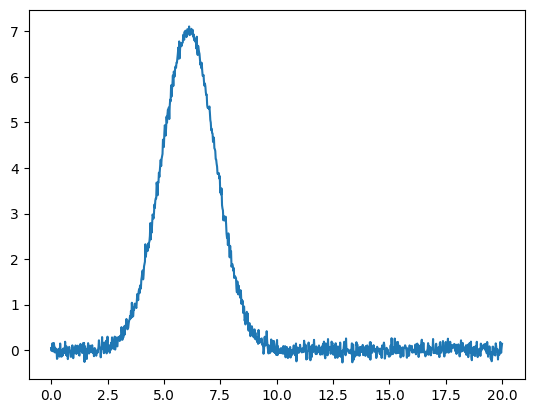

In [28]:
np.random.seed(42)
x = np.linspace(0, 20.0, 1001)
data = (gaussian(x, 21, 6.1, 1.2) + np.random.normal(scale=0.1, size=x.size))
plt.plot(x, data);
plt.savefig("gaussian with noise.png")

# Curve fitting

{'a': 21.032607062045916, 'b': 6.100343154231894, 'c': 1.2009255098841871}

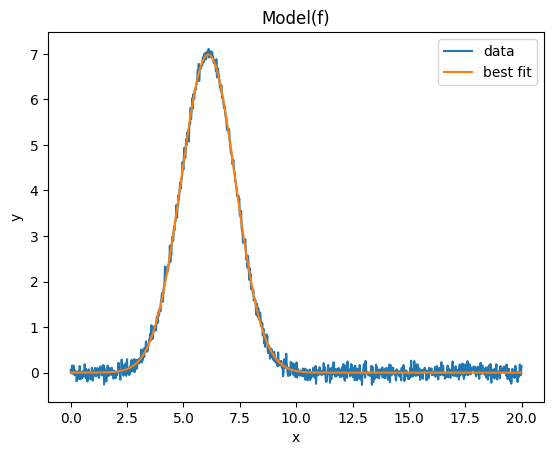

In [29]:
def f(x, a, b, c):
    return gaussian(x, a, b, c) 

mod = lmfit.Model(f)
# we set the parameters (and some initial parameter guesses)
mod.set_param_hint("a", value=10.0, vary=True)
mod.set_param_hint("b", value=10.0, vary=True)
mod.set_param_hint("c", value=10.0, vary=True)

params = mod.make_params()

result = mod.fit(data, params, method="leastsq", x=x)  # fitting
result.plot_fit(datafmt="-");
result.best_values

# UN Data

In [30]:
beds = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/beds.csv", header=0)
agegroups = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/agegroups.csv")
probabilities = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/probabilities.csv")
covid_data = pd.read_csv("https://data.humdata.org/hxlproxy/data/download/time_series_covid19_deaths_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv", parse_dates=["Date"], skiprows=[1])
covid_data["Location"] = covid_data["Country/Region"]

pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/beds.csv", header=0)

,Country,Continent,ICU_Beds
0,Japan,Asia,7.30
1,South Korea,Asia,10.60
2,Russia,Europe,8.30
3,Germany,Europe,29.20
4,Austria,Europe,21.80
5,Hungary,Europe,13.80
6,Czech Republic,Europe,11.60
7,Poland,Europe,6.90
8,Lithuania,Europe,15.50
9,France,Europe,11.60


In [31]:
# create some dicts for fast lookup
# 1. beds
beds_lookup = dict(zip(beds["Country"], beds["ICU_Beds"]))
# 2. agegroups
agegroup_lookup = dict(zip(agegroups['Location'], agegroups[['0_9', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80_89', '90_100']].values))

# store the probabilities collected
prob_I_to_C_1 = list(probabilities.prob_I_to_ICU_1.values)
prob_I_to_C_2 = list(probabilities.prob_I_to_ICU_2.values)
prob_C_to_Death_1 = list(probabilities.prob_ICU_to_Death_1.values)
prob_C_to_Death_2 = list(probabilities.prob_ICU_to_Death_2.values)

In [32]:
beds.head(3)

,Country,Continent,ICU_Beds
0,Japan,Asia,7.3
1,South Korea,Asia,10.6
2,Russia,Europe,8.3


In [33]:
agegroups.head(5)

,Unnamed: 0,Location,0_9,10_19,20_29,30_39,40_49,50_59,60_69,70_79,80_89,90_100,Total
0,0,World,1.342381e+09,1.253463e+09,1.192080e+09,1.150350e+09,973155000.0,833622000.0,591786000.0,312459000.0,124116000.0,20814000.0,7.794226e+09
1,1,Sustainable Development Goal (SDG) regions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2,2,Sub-Saharan Africa,3.243990e+08,2.534300e+08,1.851890e+08,1.334170e+08,89292000.0,56464000.0,33385000.0,15120000.0,3477000.0,191000.0,1.094364e+09
3,3,Eastern Africa,1.300380e+08,1.056750e+08,7.815600e+07,5.410800e+07,35271000.0,21714000.0,12849000.0,5978000.0,1513000.0,102000.0,4.454040e+08
4,4,Burundi,3.873000e+06,2.725000e+06,2.030000e+06,1.539000e+06,748000.0,492000.0,339000.0,112000.0,30000.0,2000.0,1.189000e+07


In [34]:
probabilities

,Age,prob_I_to_ICU_1,prob_ICU_to_Death_1,prob_I_to_ICU_2,prob_ICU_to_Death_2
0,0_9,0.001,0.00,0.00100,0.000
1,10_19,0.003,0.00,0.00300,0.000
2,20_29,0.009,0.05,0.00600,0.000
3,30_39,0.025,0.06,0.00900,0.000
4,40_49,0.030,0.10,0.02500,0.120
5,50_59,0.050,0.26,0.03560,0.365
6,60_69,0.070,0.57,0.05926,0.675
7,70_79,0.100,0.86,0.10100,0.850
8,80_89,0.140,0.95,0.14100,0.950
9,90_100,0.160,0.98,0.16000,0.990


In [35]:
covid_data

,Province/State,Country/Region,Lat,Long,Date,Value,ISO 3166-1 Alpha 3-Codes,Region Code,Sub-region Code,Intermediate Region Code,Location
0,NaN,Afghanistan,33.939110,67.709953,2023-03-09,7896,AFG,142.0,34.0,NaN,Afghanistan
1,NaN,Afghanistan,33.939110,67.709953,2023-03-08,7896,AFG,142.0,34.0,NaN,Afghanistan
2,NaN,Afghanistan,33.939110,67.709953,2023-03-07,7896,AFG,142.0,34.0,NaN,Afghanistan
3,NaN,Afghanistan,33.939110,67.709953,2023-03-06,7896,AFG,142.0,34.0,NaN,Afghanistan
4,NaN,Afghanistan,33.939110,67.709953,2023-03-05,7896,AFG,142.0,34.0,NaN,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
330322,NaN,Zimbabwe,-19.015438,29.154857,2020-01-26,0,ZWE,2.0,202.0,14.0,Zimbabwe
330323,NaN,Zimbabwe,-19.015438,29.154857,2020-01-25,0,ZWE,2.0,202.0,14.0,Zimbabwe
330324,NaN,Zimbabwe,-19.015438,29.154857,2020-01-24,0,ZWE,2.0,202.0,14.0,Zimbabwe
330325,NaN,Zimbabwe,-19.015438,29.154857,2020-01-23,0,ZWE,2.0,202.0,14.0,Zimbabwe


# Derivatives

In [36]:
def deriv(y, t, beta, gamma, sigma, N, p_I_to_C, p_C_to_D, Beds):
    S, E, I, C, R, D = y

    dSdt = -beta(t) * I * S / N
    dEdt = beta(t) * I * S / N - sigma * E
    dIdt = sigma * E - 1/12.0 * p_I_to_C * I - gamma * (1 - p_I_to_C) * I
    dCdt = 1/12.0 * p_I_to_C * I - 1/7.5 * p_C_to_D * min(Beds(t), C) - max(0, C-Beds(t)) - (1 - p_C_to_D) * 1/6.5 * min(Beds(t), C)
    dRdt = gamma * (1 - p_I_to_C) * I + (1 - p_C_to_D) * 1/6.5 * min(Beds(t), C)
    dDdt = 1/7.5 * p_C_to_D * min(Beds(t), C) + max(0, C-Beds(t))
    return dSdt, dEdt, dIdt, dCdt, dRdt, dDdt

# Initial Conditions and Functions

In [37]:
gamma = 1.0/9.0
sigma = 1.0/3.0

def logistic_R_0(t, R_0_start, k, x0, R_0_end):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def Model(days, agegroups, beds_per_100k, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s):

    def beta(t):
        return logistic_R_0(t, R_0_start, k, x0, R_0_end) * gamma

    # agegroups is list with number of people per age group -> sum to get population
    N = sum(agegroups)  
    
    def Beds(t):
        # the table stores beds per 100 k -> get total number
        beds_0 = beds_per_100k / 100_000 * N  
        return beds_0 + s*beds_0*t  # 0.003

    y0 = N-1.0, 1.0, 0.0, 0.0, 0.0, 0.0  # one exposed, everyone else susceptible
    t = np.linspace(0, days, days)
    ret = odeint(deriv, y0, t, args=(beta, gamma, sigma, N, prob_I_to_C, prob_C_to_D, Beds))
    S, E, I, C, R, D = ret.T

    R_0_over_time = [beta(i)/gamma for i in range(len(t))]  # get R0 over time for plotting

    return t, S, E, I, C, R, D, R_0_over_time, Beds, prob_I_to_C, prob_C_to_D